# Iterative Methods
## Jacobi

Simultaneously solve each row of the matrix using current solution values from current iterate:

$u^{(k+1)}_i = \frac{1}{a_{i,i}} (f_i - \sum_{j\neq i} a_{i,j}u^{(k)}_j)$
 
$\mathbf{u} \leftarrow D^{-1}(\mathbf{f} + (L+U)\mathbf{u})$

In [431]:
# Import some python libraries we need
import numpy as np
import matplotlib.pyplot as plt

# Size of the problem
n = 16

# 1D Model problem
A = np.diag(2*np.ones(n)) + np.diag(-1*np.ones(n-1),k=-1) + np.diag(-1*np.ones(n-1),k=1) 

# A has random entries
# A = np.ones((n,n)) + 2*np.random.rand(n,n)

# Enforce diagonal dominance
# A = A + np.diag(np.sum(A,axis=0))

# Print the matrix
# print(A)

# Define a random solution and corresponding right-hand side
u_final = np.random.rand(n)
f = np.dot(A,u_final)
u = np.zeros((n,))

# Define a constant right-hand side and corresponding solution
# f = np.ones(n)
# u_final = np.linalg.solve(A,f)
# u = np.zeros((n,))

# Define a zero right-hand side and random initial guess
# f = np.zeros(n)
# u_final = np.zeros(n)
# u = -1 + 2*np.random.rand(n)
# u = np.cos(np.arange(n)*np.pi)

# Initialize iteration count and next iterate
u_next = u.copy()
i = 0

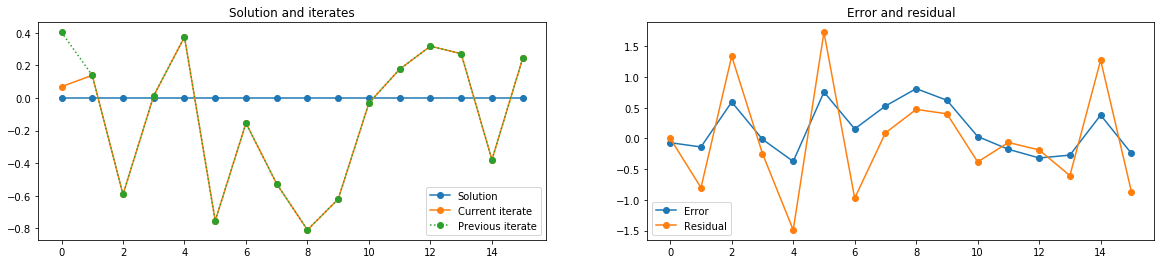

In [400]:
# Visualize Jacobi, step by step

# Initialize to the right-hand side
u_next[i] = f[i]

# Subtract off (L+U)u
for j in range(n):
    if j == i:
        diag = A[i,j]
    else:
        u_next[i] = u_next[i] - A[i,j]*u[j]

# Divide by the diagonal        
u_next[i] = u_next[i]/diag
        
# Go to the next degree of freedom
if i == n-1:
    i = 0
    u = u_next.copy()
else:
    i = (i + 1)
    
# Plot progress toward solution
plt.subplots(figsize=(20, 4))
plt.subplot(1,2,1)
plt.title('Solution and iterates')
plt.plot(u_final,'-o')
plt.plot(u_next,'-o')
plt.plot(u,':o')
plt.legend(['Solution','Current iterate','Previous iterate'])

# Plot error
plt.subplot(1,2,2)
plt.title('Error and residual')
plt.plot(u_final - u_next,'-o')
plt.plot(np.dot(A,(u_final - u_next)),'-o')
plt.legend(['Error','Residual'])
plt.show()

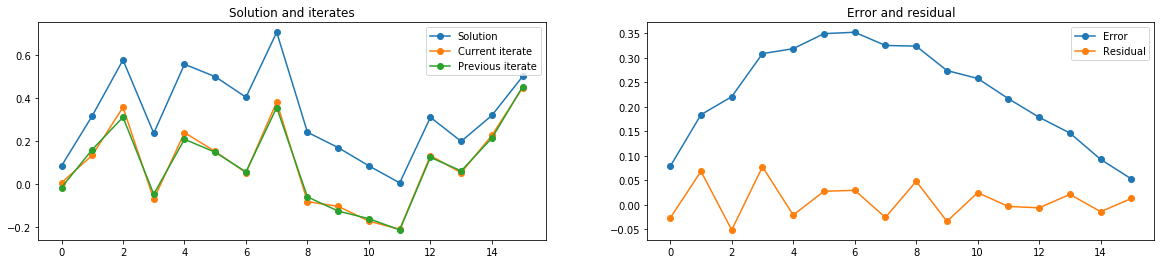

In [444]:
# Visualize Jacobi, iteration by iteration
u_init = u.copy()
numIterations = 1
for k in range(numIterations):
    for i in range(n):
        # Initialize to the right-hand side
        u_next[i] = f[i]

        # Subtract off (L+U)u
        for j in range(n):
            if j == i:
                diag = A[i,j]
            else:
                u_next[i] = u_next[i] - A[i,j]*u[j]

        # Divide by the diagonal        
        u_next[i] = u_next[i]/diag

    # Update iterate
    u = u_next.copy()
    
# Plot progress toward solution
plt.subplots(figsize=(20, 4))
plt.subplot(1,2,1)
plt.title('Solution and iterates')
plt.plot(u_final,'-o')
plt.plot(u,'-o')
plt.plot(u_init,'-o')
plt.legend(['Solution','Current iterate','Previous iterate'])

# Plot error
plt.subplot(1,2,2)
plt.title('Error and residual')
plt.plot(u_final - u,'-o')
plt.plot(np.dot(A,(u_final - u)),'-o')
plt.legend(['Error','Residual'])
plt.show()

# Iterative Methods
## Weighted Jacobi

Take a weighted step toward the next Jacobi iterate:

$u^{(k+1)}_i = (1 - \omega)u^{(k)}_j + \omega\frac{1}{a_{i,i}} (f_i - \sum_{j\neq i} a_{i,j}u^{(k)}_j)$
 
$\mathbf{u} \leftarrow (1 - \omega)\mathbf{u} + \omega D^{-1}(\mathbf{f} + (L+U)\mathbf{u})$

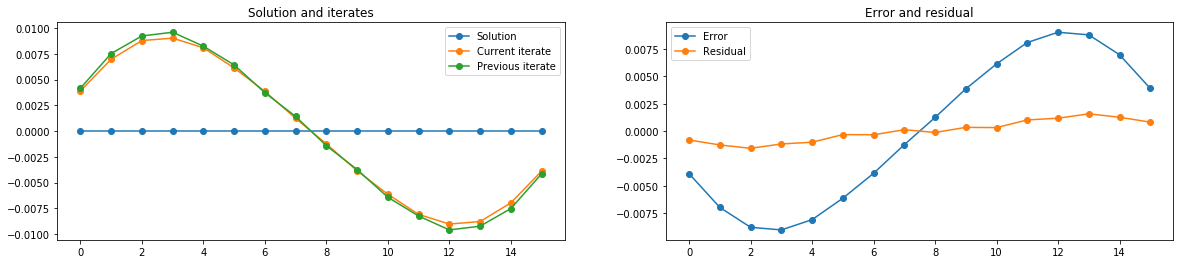

In [365]:
# Visualize weigthed Jacobi, iteration by iteration
u_init = u.copy()
omega = 2/3
numIterations = 1
for k in range(numIterations):
    for i in range(n):
        # Initialize to the right-hand side
        u_next[i] = f[i]

        # Subtract off (L+U)u
        for j in range(n):
            if j == i:
                diag = A[i,j]
            else:
                u_next[i] = u_next[i] - A[i,j]*u[j]

        # Divide by the diagonal        
        u_next[i] = u_next[i]/diag

    # Update iterate
    u = (1.0 - omega)*u + omega*u_next
    
# Plot progress toward solution
plt.subplots(figsize=(20, 4))
plt.subplot(1,2,1)
plt.title('Solution and iterates')
plt.plot(u_final,'-o')
plt.plot(u,'-o')
plt.plot(u_init,'-o')
plt.legend(['Solution','Current iterate','Previous iterate'])

# Plot error
plt.subplot(1,2,2)
plt.title('Error and residual')
plt.plot(u_final - u,'-o')
plt.plot(np.dot(A,(u_final - u)),'-o')
plt.legend(['Error','Residual'])
plt.show()

## Gauss-Seidel

Simultaneously solve each row of the matrix using current solution values from current iterate:

$u_i \leftarrow \frac{1}{a_{i,i}} (f_i - \sum_{j\neq i} a_{i,j}u_j)$
 
$\mathbf{u} \leftarrow (D-L)^{-1}(\mathbf{f} + U\mathbf{u})$

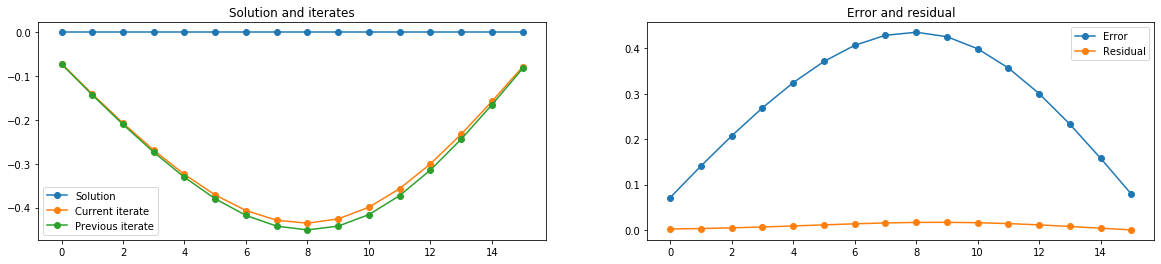

In [395]:
# Visualize Gauss-Seidel, iteration by iteration
u_init = u.copy()
numIterations = 1
for k in range(numIterations):
    for i in range(n):
        # Initialize to the right-hand side
        u[i] = f[i]

        # Subtract off (L+U)u
        for j in range(n):
            if j == i:
                diag = A[i,j]
            else:
                u[i] = u[i] - A[i,j]*u[j]

        # Divide by the diagonal        
        u[i] = u[i]/diag
    
# Plot progress toward solution
plt.subplots(figsize=(20, 4))
plt.subplot(1,2,1)
plt.title('Solution and iterates')
plt.plot(u_final,'-o')
plt.plot(u,'-o')
plt.plot(u_init,'-o')
plt.legend(['Solution','Current iterate','Previous iterate'])

# Plot error
plt.subplot(1,2,2)
plt.title('Error and residual')
plt.plot(u_final - u,'-o')
plt.plot(np.dot(A,u_final - u),'-o')
plt.legend(['Error','Residual'])
plt.show()